#NBA Scrapy

> Scrapy je Python okvir za web scraping. Pruža sve alate koji su potrebni za učinkovito izdvajanje podataka s web stranica, njihovu obradu i pohranjivanje u željenu strukturu i format.

[NBA web stranica](https://www.nba.com/games)





##Instaliranje scrapy-a i postavljanje putanje za rad

In [ ]:
!pip install scrapy

     |████████████████████████████████| 254 kB 8.4 MB/s 
     |████████████████████████████████| 3.6 MB 45.7 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 3.2 MB 22.1 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 3.1 MB 30.7 MB/s 
     |████████████████████████████████| 251 kB 40.7 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7782 sha256=9128f534126cf62f1a139647e027681eda1cb0491a0778c3c7df4b4ee79db81e
  Stored in directory: /root/.cache/pip/wheels/ca/44/01/3592ccfbcfaee4ab297c4097e6e9dbe1c7697e3531a39877ab
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11515 sha256=78f2551c856812e9712025a06d4e574f3a5b3026cf2c14659fade6bdbc298c63
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa

In [ ]:
%cd /content/drive/MyDrive/4.godina/Znanstveno programiranje/Scrapy - NBA

/content/drive/MyDrive/4.godina/Znanstveno programiranje/Scrapy - NBA


##Izrada novog scrapy projekta

In [ ]:
!scrapy startproject NBA_Spider

Ovo će stvoriti direktorij sa sljedećim sadržajem:

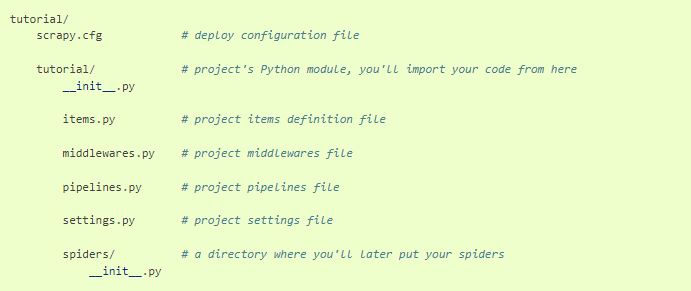

##Izrada Spidera

> Spider je klasa koju definiramo i koje Scrapy koristi za skidanje informacija s web-stranica.

> Moraju definirati početne zahtjeve koje treba napraviti, opcionalno kako slijediti veze na stranicama i kako raščlaniti preuzeti sadržaj stranice za izdvajanje podataka.

In [ ]:
import scrapy, json

In [ ]:
class NBA_Spider(scrapy.Spider):

  name="NBA_Spider"

  start_urls = []
  input_file = open('nba_links.txt', 'r')

  for link in input_file:
    start_urls.append(link)

  def parse(self, response):
    content = response.xpath('//script[@type="application/json"]/text()').get()
    data = json.loads(content)
    homeTeam = data['props']['pageProps']['game']['homeTeam']['teamCity']+" "+data['props']['pageProps']['game']['homeTeam']['teamName']
    pointsHomeTeam = data['props']['pageProps']['game']['homeTeam']['score']
    awayTeam = data['props']['pageProps']['game']['awayTeam']['teamCity']+" "+data['props']['pageProps']['game']['awayTeam']['teamName']
    pointsAwayTeam = data['props']['pageProps']['game']['awayTeam']['score']
    dateGame = data['props']['pageProps']['game']['gameTimeUTC'][:10]
    # new_string = json.dumps(data, indent=2)
    
    yield {
        'homeTeam': homeTeam,
        'pointsHomeTeam': pointsHomeTeam,
        'awayTeam': awayTeam,
        'pointsAwayTeam': pointsAwayTeam,
        'dateGame': dateGame
    }

> Parse metoda : pozvana da obradi svaki od zahtjeva navedenih URL-ova, analizira odgovor i izdvaja skupljene podatke kao rječnike.

> json.loads : pretvaranje json stringa u Python rječnik

> Yield : da bismo izvučene podatke sa web stranice spremili u rječnik koristimo ključnu riječ yield

##Spremanje podataka dohvaćenih sa web stranice




In [ ]:
%cd /content/drive/MyDrive/4.godina/Znanstveno programiranje/Scrapy - NBA/NBA_Spider/NBA_Spider/spiders

/content/drive/MyDrive/4.godina/Znanstveno programiranje/Scrapy - NBA/NBA_Spider/NBA_Spider/spiders


In [ ]:
!scrapy crawl NBA_Spider -O nba_data.csv

##Prikaz spremljenih podataka u DataFrame-u

In [ ]:
import pandas as pd

In [ ]:
nba_data = pd.read_csv('nba_data.csv')

In [ ]:
nba_data.columns = ['Home team', 'Points for home team', 'Away team', 'Points for away team', 'Date']

In [ ]:
nba_data

,Home team,Points for home team,Away team,Points for away team,Date
0,Orlando Magic,108,Denver Nuggets,103,2021-12-02
1,Boston Celtics,88,Philadelphia 76ers,87,2021-12-02
2,Indiana Pacers,111,Atlanta Hawks,114,2021-12-02
3,Miami Heat,85,Cleveland Cavaliers,111,2021-12-02
4,Milwaukee Bucks,127,Charlotte Hornets,125,2021-12-02
...,...,...,...,...,...
56,Oklahoma City Thunder,110,Houston Rockets,114,2021-12-02
57,New Orleans Pelicans,127,Washington Wizards,102,2021-11-25
58,Oklahoma City Thunder,99,Washington Wizards,101,2021-11-27
59,Boston Celtics,104,Brooklyn Nets,123,2021-11-25
